In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../../Dataset/GermanCreditDataset.csv")


In [3]:
df.head(5)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [5]:
category_columns = []

for col in df.drop(columns = "default", axis = 1).columns:
    if df[col].dtype == "object":
        category_columns.append(col)

In [6]:
for i in range(0, len(category_columns)):
    print(df[category_columns[i]].value_counts(normalize = True) * 100)
    print()

checking_balance
unknown       39.4
< 0 DM        27.4
1 - 200 DM    26.9
> 200 DM       6.3
Name: proportion, dtype: float64

credit_history
good         53.0
critical     29.3
poor          8.8
very good     4.9
perfect       4.0
Name: proportion, dtype: float64

purpose
furniture/appliances    47.3
car                     33.7
business                 9.7
education                5.9
renovations              2.2
car0                     1.2
Name: proportion, dtype: float64

savings_balance
< 100 DM         60.3
unknown          18.3
100 - 500 DM     10.3
500 - 1000 DM     6.3
> 1000 DM         4.8
Name: proportion, dtype: float64

employment_duration
1 - 4 years    33.9
> 7 years      25.3
4 - 7 years    17.4
< 1 year       17.2
unemployed      6.2
Name: proportion, dtype: float64

other_credit
none     81.4
bank     13.9
store     4.7
Name: proportion, dtype: float64

housing
own      71.3
rent     17.9
other    10.8
Name: proportion, dtype: float64

job
skilled       63.0
unskille

In [7]:
# Replacing car0 with car
df["purpose"].replace("car0", "car", inplace = True)

C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_3828\3321340696.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["purpose"].replace("car0", "car", inplace = True)


In [8]:
# Create new data
data = df.copy()

In [9]:
# Will do hot encoding to convert categorical data into Numerical Data
df_encoded = pd.get_dummies(df, columns = category_columns, drop_first = False)


In [10]:
category_columns

['checking_balance',
 'credit_history',
 'purpose',
 'savings_balance',
 'employment_duration',
 'other_credit',
 'housing',
 'job',
 'phone']

In [11]:
df["default"].replace(["yes", "no"], [1, 0], inplace = True)

C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_3828\475654969.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["default"].replace(["yes", "no"], [1, 0], inplace = True)
C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_3828\475654969.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d

In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   months_loan_duration             1000 non-null   int64 
 1   amount                           1000 non-null   int64 
 2   percent_of_income                1000 non-null   int64 
 3   years_at_residence               1000 non-null   int64 
 4   age                              1000 non-null   int64 
 5   existing_loans_count             1000 non-null   int64 
 6   dependents                       1000 non-null   int64 
 7   default                          1000 non-null   object
 8   checking_balance_1 - 200 DM      1000 non-null   bool  
 9   checking_balance_< 0 DM          1000 non-null   bool  
 10  checking_balance_> 200 DM        1000 non-null   bool  
 11  checking_balance_unknown         1000 non-null   bool  
 12  credit_history_critical          10

## Train Test Split

In [13]:
X = df_encoded.drop(columns = "default", axis = 1)
Y = df_encoded[["default"]]

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1) 

In [15]:
x_train.shape, x_test.shape

((700, 43), (300, 43))

## Builiding DecisionTree Model

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [17]:
dt_model = DecisionTreeClassifier() 

In [18]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_auc_score

def evaluate_model(model, x, y, evalType):
    print(f"\t\t---------------- {evalType} -------------- ")
    y_predict = model.predict(x)

    Acc_test = print(f"The accuracy of the model is {model.score(x,y)}")

    CM_test = print(sns.heatmap((metrics.confusion_matrix(y, y_predict)), annot = True, fmt='.5g', cmap='Blues'))
    plt.xlabel('Predicted');
    plt.ylabel('Actuals',rotation=0);
    plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

    CR_test = print(metrics.classification_report(y,y_predict))

    probs = model.predict_proba(x)
    probs = probs[:, 1]
    auc_test = roc_auc_score(y, probs)
    
    return Acc_test,CM_test,CR_test,auc_test 

		---------------- Train Data -------------- 
The accuracy of the model is 1.0
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

          no       1.00      1.00      1.00       486
         yes       1.00      1.00      1.00       214

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



(None, None, None, 1.0)

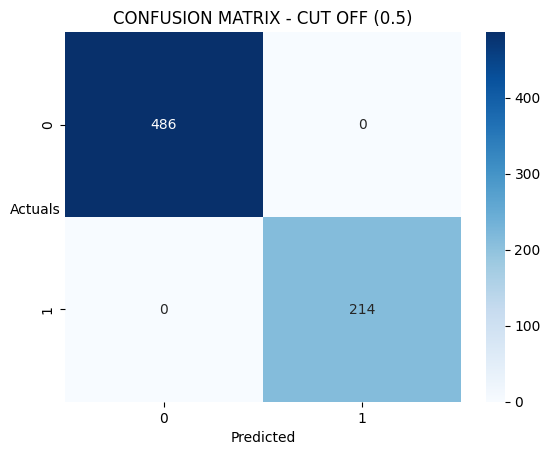

In [20]:
evaluate_model(dt_model, x_train, y_train, "Train Data")

		---------------- Test Data -------------- 
The accuracy of the model is 0.6933333333333334
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

          no       0.77      0.81      0.79       214
         yes       0.46      0.41      0.43        86

    accuracy                           0.69       300
   macro avg       0.62      0.61      0.61       300
weighted avg       0.68      0.69      0.69       300



(None, None, None, 0.6076939795696589)

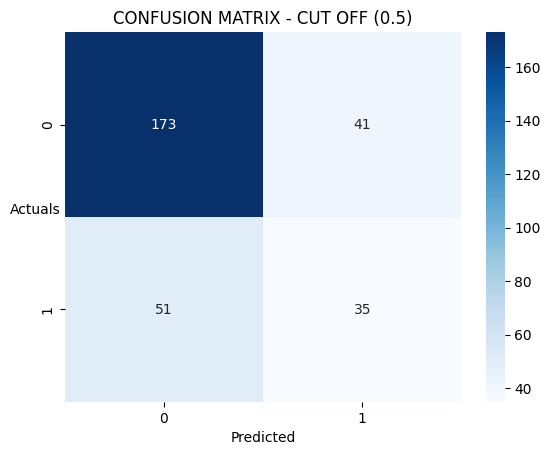

In [21]:
evaluate_model(dt_model, x_test, y_test, "Test Data")

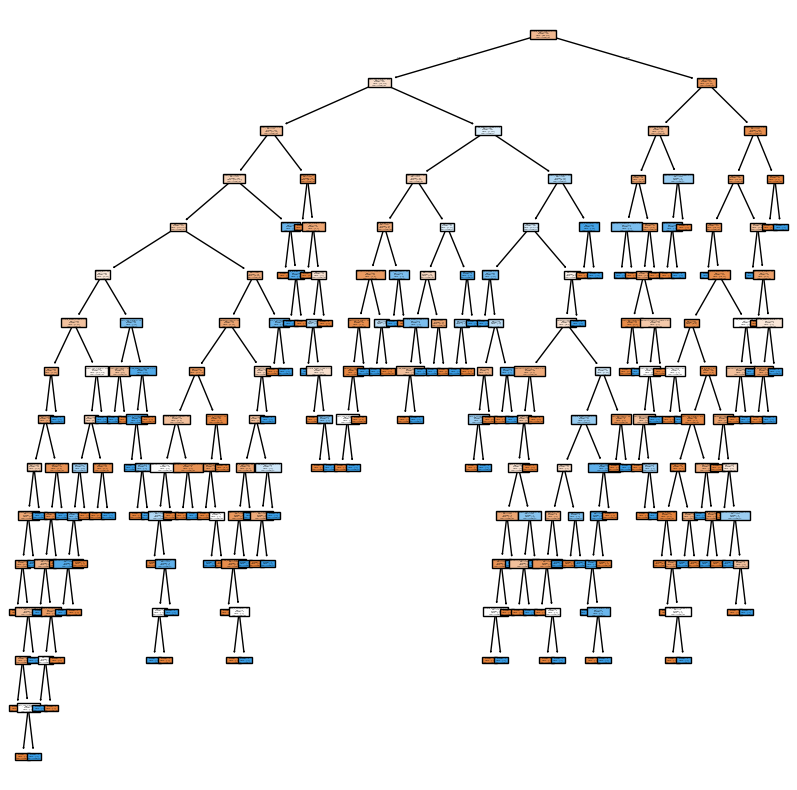

In [22]:
# We can see the model is overfitted
# Let's see the actual tree

plt.figure(figsize = [10, 10])
plot_tree(dt_model, feature_names = X.columns, class_names = ["Default_Yes", "Default_No"], filled = True)
plt.show()

### Vairable Importance

In [23]:
# from sklearn.feature_selection import mutual_info_classif
# plt.figure(figsize=(30, 30))

# importances = mutual_info_classif() 

In [24]:
pd.DataFrame(data = dt_model.feature_importances_ * 100, index = X.columns).sort_values(by=0, ascending = False)

,0
amount,18.440104
months_loan_duration,12.787491
age,10.595629
checking_balance_unknown,9.815739
credit_history_critical,3.503209
percent_of_income,3.490159
checking_balance_< 0 DM,3.133542
purpose_car,3.112762
years_at_residence,3.036675
employment_duration_> 7 years,2.825746


### DecisionTree Pruning

In [25]:
dt_model_pruned = DecisionTreeClassifier(
    criterion = "entropy", 
    max_depth = 7, 
    min_samples_split = 20,
    min_samples_leaf = 30,
    max_leaf_nodes = 7 
)

In [26]:
dt_model_pruned.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=7,
                       min_samples_leaf=30, min_samples_split=20)

		---------------- Train Data -------------- 
The accuracy of the model is 0.7185714285714285
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

          no       0.78      0.83      0.80       486
         yes       0.55      0.47      0.51       214

    accuracy                           0.72       700
   macro avg       0.66      0.65      0.65       700
weighted avg       0.71      0.72      0.71       700



(None, None, None, 0.7568122379908465)

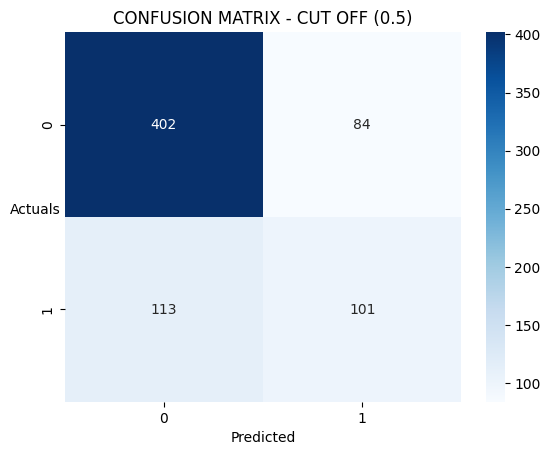

In [27]:
evaluate_model(dt_model_pruned, x_train, y_train, "Train Data")

		---------------- Test Data -------------- 
The accuracy of the model is 0.72
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

          no       0.79      0.84      0.81       214
         yes       0.51      0.43      0.47        86

    accuracy                           0.72       300
   macro avg       0.65      0.63      0.64       300
weighted avg       0.71      0.72      0.71       300



(None, None, None, 0.699820691154097)

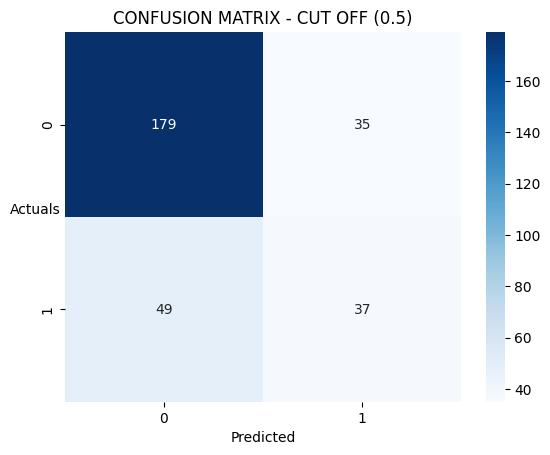

In [28]:
evaluate_model(dt_model_pruned, x_test, y_test, "Test Data")

### Running Grid Search 

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [5, 7, 10, None],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4],
    "max_features" : [None, "sqrt", "log2"]
}

grid_search = GridSearchCV(
    estimator = dt_model,
    param_grid = param_grid,
    cv = 5,
    scoring="recall",
    n_jobs = -1,
    verbose = 1
)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan n

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 7, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall', verbose=1)

		---------------- Test  -------------- 
The accuracy of the model is 0.71
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

          no       0.73      0.94      0.82       214
         yes       0.48      0.14      0.22        86

    accuracy                           0.71       300
   macro avg       0.61      0.54      0.52       300
weighted avg       0.66      0.71      0.65       300



(None, None, None, 0.6570310801999566)

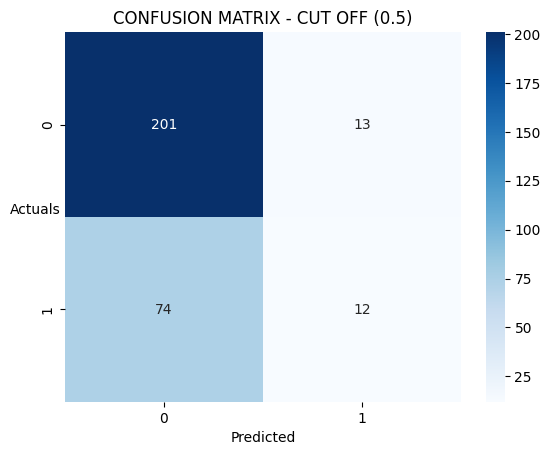

In [30]:
evaluate_model(grid_search.best_estimator_, x_test, y_test, "Test ")

## Ensemble Learning
- Ensemble learning combines multiple learners to improve predictive performance 
- Ensemble learning is a machine learning technique that aggregates two or more learners (e.g. regression models, neural networks) in order to produce better predictions. In other words, an ensemble model combines several individual models to produce more accurate predictions than a single model alone.
- Ensemble learning gives credence to the idea of the “wisdom of crowds,” which suggests that the decision-making of a larger group of people is typically better than that of an individual expert.
### Ensemble learning techniques
- Perhaps three of the most popular ensemble learning techniques are bagging, boosting, and stacking. 





#### 1. Bagging
- Bagging is a homogenous parallel method sometimes called bootstrap aggregating. It uses modified replicates of a given training data set to train multiple base learners with the same training algorithm.1

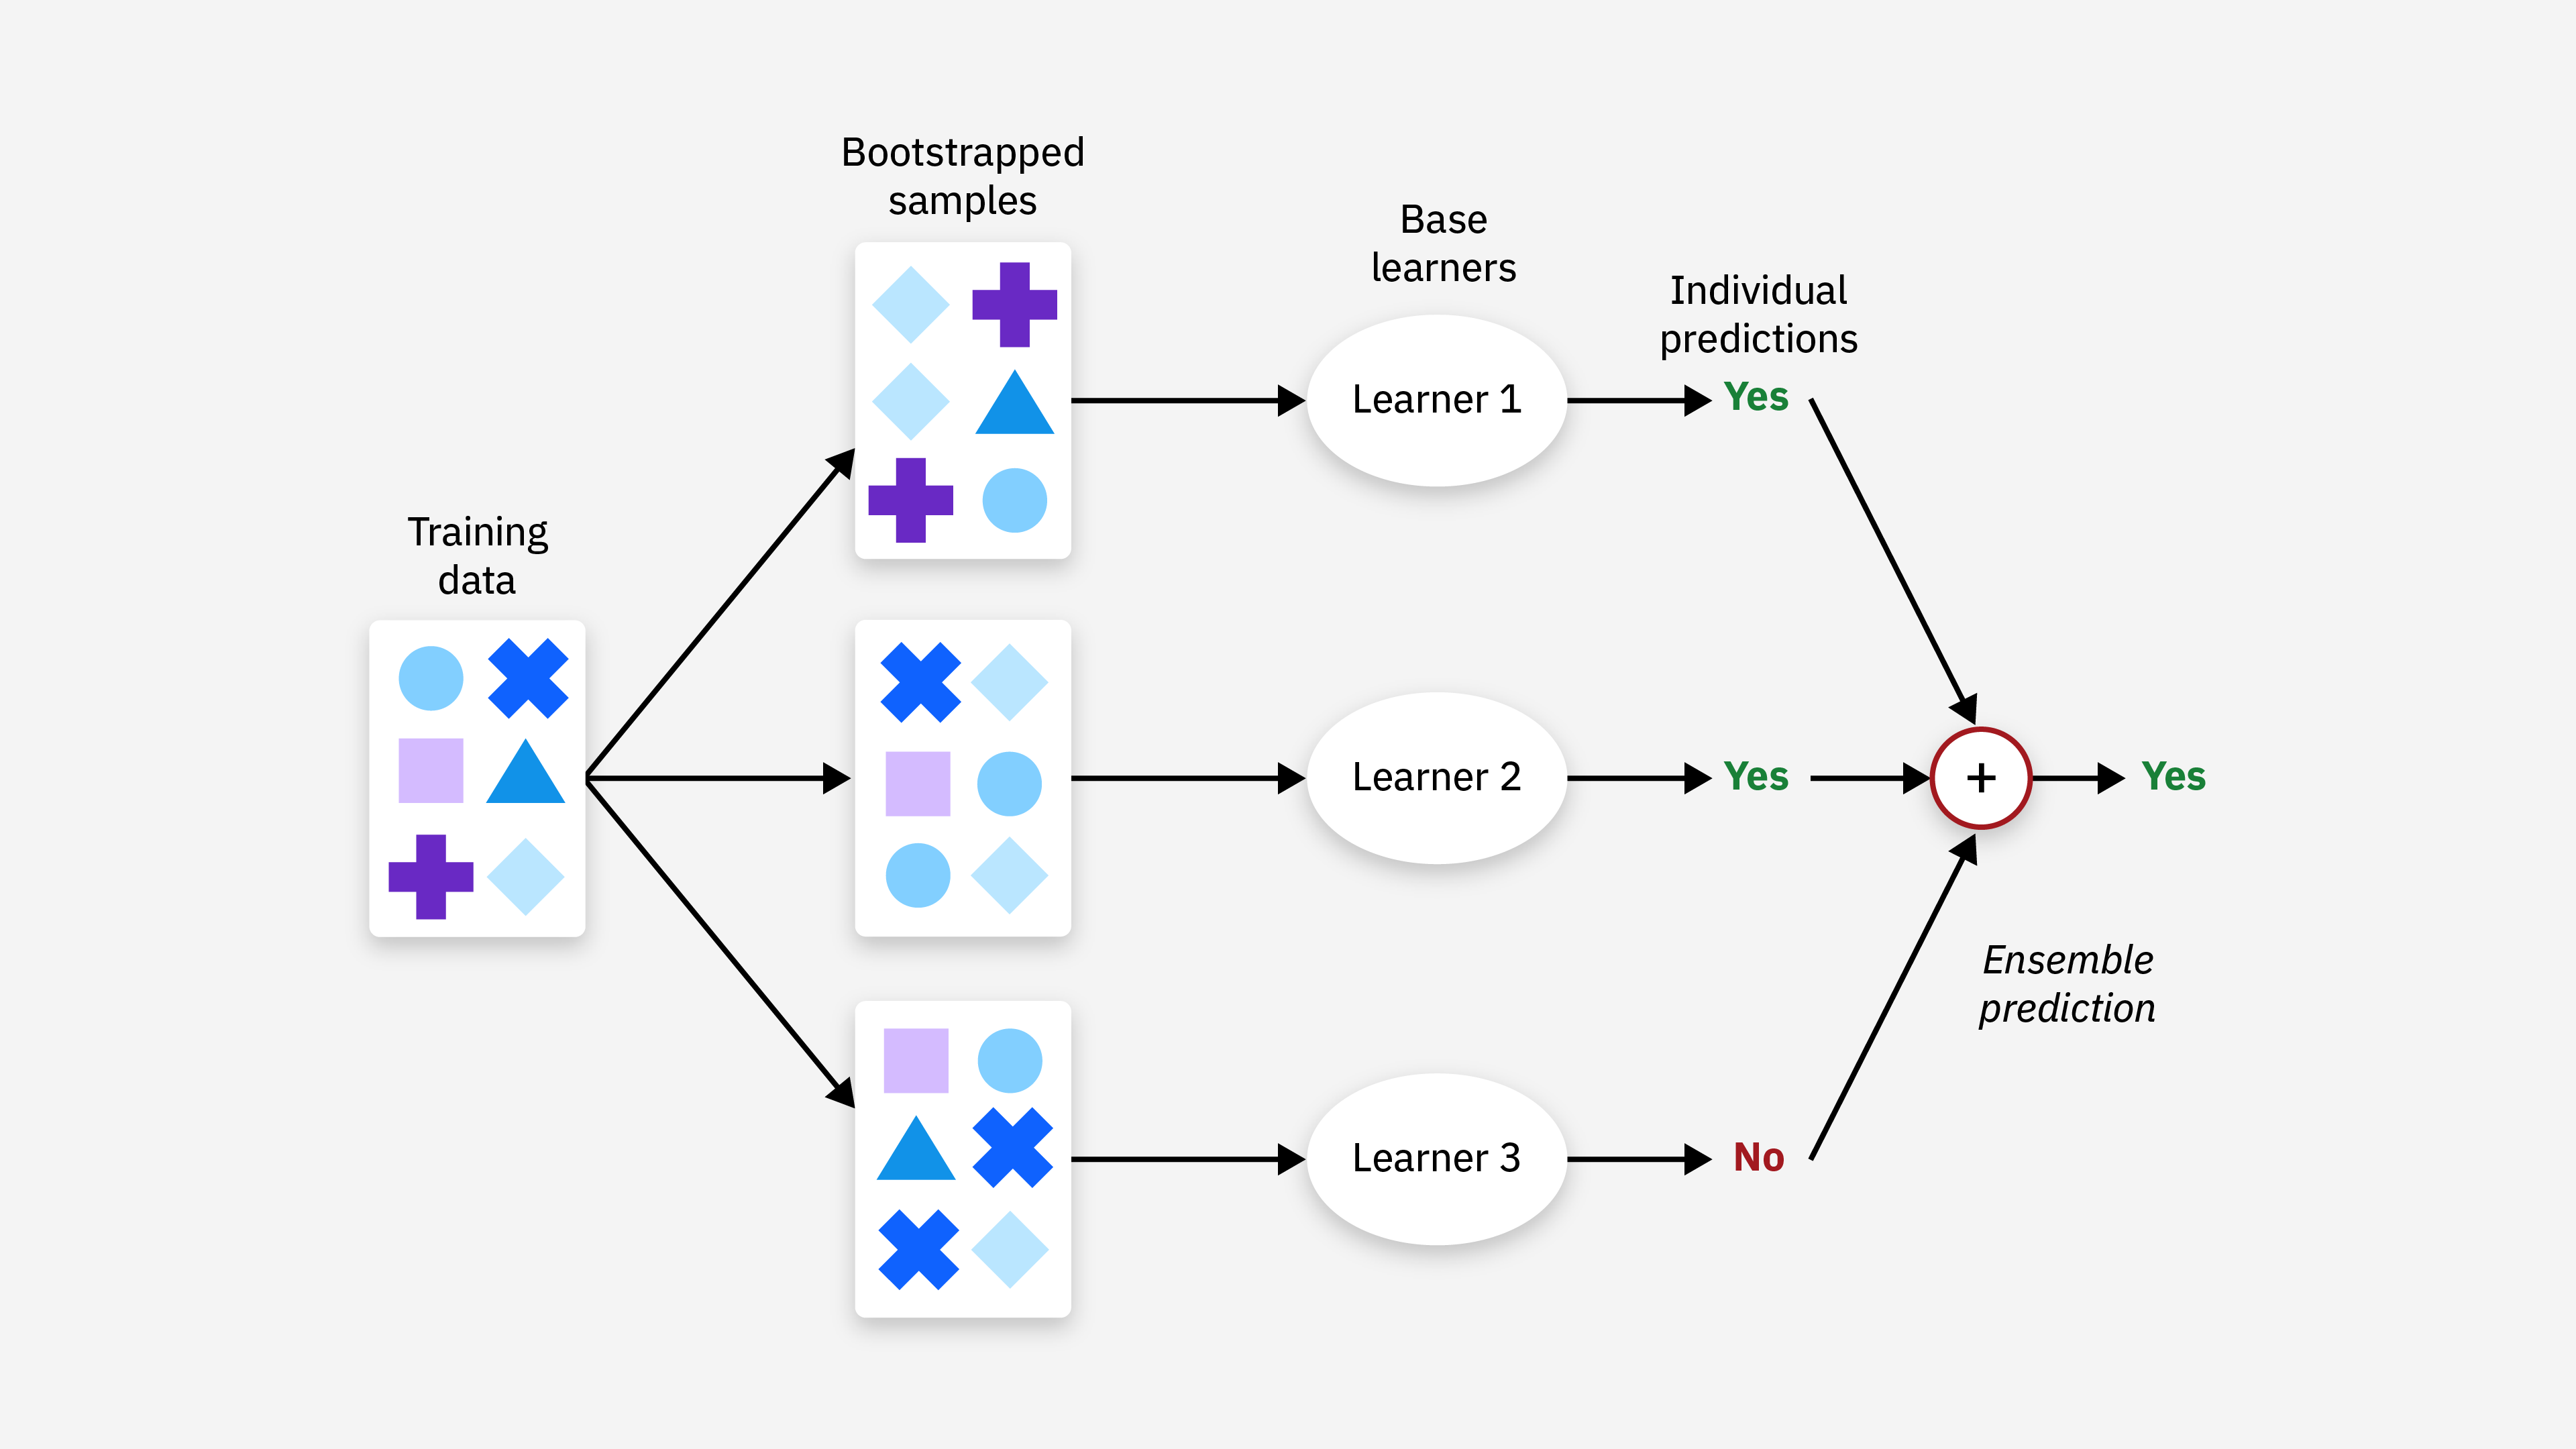

In [31]:
# Import BeggingClassifier
from sklearn.ensemble import BaggingClassifier


In [32]:
bgcl = BaggingClassifier(estimator = dt_model, n_estimators = 5)

In [33]:
bgcl.fit(x_train, y_train)

C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

		---------------- Test -------------- 
The accuracy of the model is 0.6966666666666667
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

          no       0.77      0.82      0.79       214
         yes       0.47      0.40      0.43        86

    accuracy                           0.70       300
   macro avg       0.62      0.61      0.61       300
weighted avg       0.68      0.70      0.69       300



(None, None, None, 0.691425777004999)

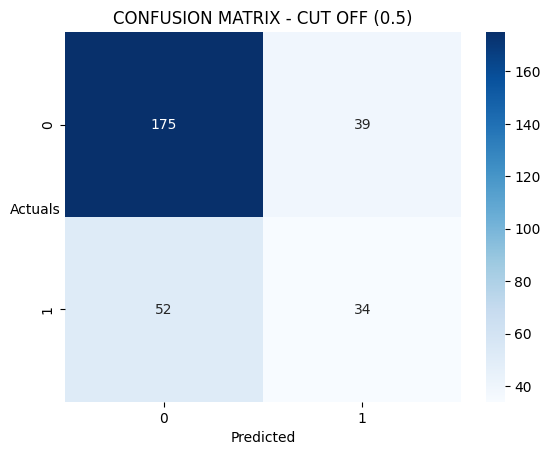

In [34]:
evaluate_model(bgcl, x_test, y_test, "Test")

In [35]:
# Grid Search on BeggingClassifier 
param_grid = {
    "n_estimators":range(10, 60)
}

grid_search = GridSearchCV(
    estimator = bgcl,
    param_grid = param_grid,
    cv = 5,
    scoring="recall",
    n_jobs = -1,
    verbose = 1
)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
                                         n_estimators=5),
             n_jobs=-1, param_grid={'n_estimators': range(10, 60)},
             scoring='recall', verbose=1)

		---------------- Test -------------- 
The accuracy of the model is 0.75
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

          no       0.78      0.90      0.84       214
         yes       0.60      0.38      0.47        86

    accuracy                           0.75       300
   macro avg       0.69      0.64      0.65       300
weighted avg       0.73      0.75      0.73       300



(None, None, None, 0.7658661160617257)

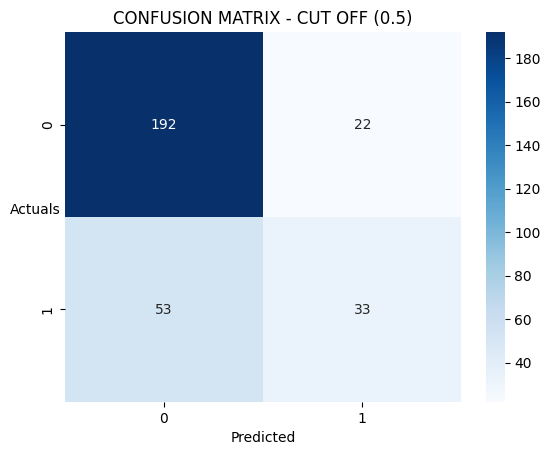

In [36]:
evaluate_model(grid_search.best_estimator_, x_test, y_test, "Test")

## Boosting
- Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors. Boosting algorithms can improve the predictive power of your data mining initiatives.
- In boosting, a random sample of data is selected, fitted with a model and then trained sequentially—that is, each model tries to compensate for the weaknesses of its predecessor. With each iteration, the weak rules from each individual classifier are combined to form one, strong prediction rule.

We have following types of boosting:
1. Ada Boost (adaptive boosting)
2. Gradient Boost
3. XG Boost

In [37]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier() 

In [38]:
ada_model.fit(x_train, y_train)

C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

		---------------- Test -------------- 
The accuracy of the model is 0.7233333333333334
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

          no       0.77      0.86      0.82       214
         yes       0.52      0.37      0.44        86

    accuracy                           0.72       300
   macro avg       0.65      0.62      0.63       300
weighted avg       0.70      0.72      0.71       300



(None, None, None, 0.7182949358835036)

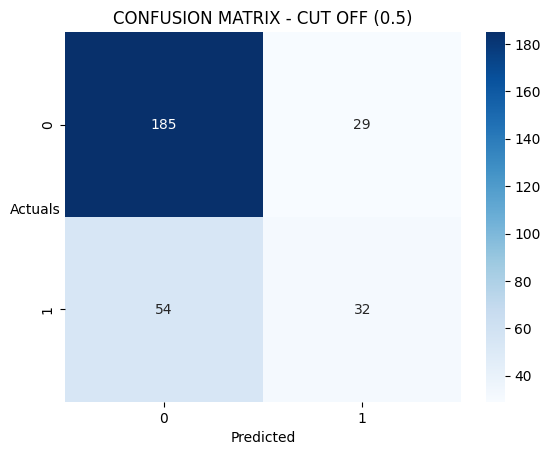

In [39]:
evaluate_model(ada_model, x_test, y_test, "Test")

In [40]:
# Gradient boost
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)

C:\Users\SHOYEB ANSARI\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

		---------------- Test -------------- 
The accuracy of the model is 0.7333333333333333
Axes(0.125,0.11;0.62x0.77)
              precision    recall  f1-score   support

          no       0.77      0.89      0.83       214
         yes       0.56      0.34      0.42        86

    accuracy                           0.73       300
   macro avg       0.66      0.61      0.62       300
weighted avg       0.71      0.73      0.71       300



(None, None, None, 0.7353836122582048)

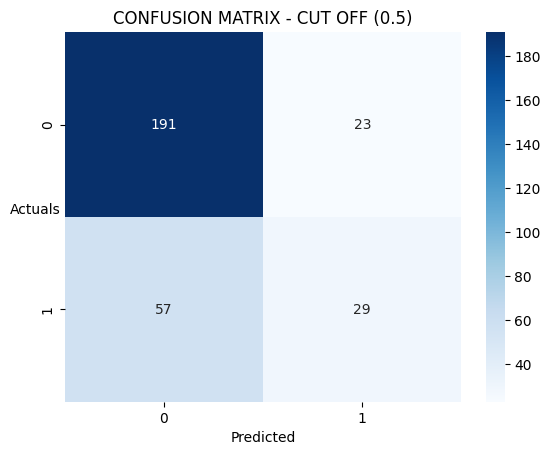

In [41]:
evaluate_model(gb_model, x_test, y_test, "Test")

In [42]:
# XG Boost 
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 4.8 MB/s eta 0:00:27
    --------------------------------------- 2.6/124.9 MB 7.5 MB/s eta 0:00:17
   - -------------------------------------- 4.7/124.9 MB 8.4 MB/s eta 0:00:15
   - -------------------------------------- 5.8/124.9 MB 8.2 MB/s eta 0:00:15
   -- ------------------------------------- 6.8/124.9 MB 6.9 MB/s eta 0:00:18
   -- ------------------------------------- 8.9/124.9 MB 7.5 MB/s eta 0:00:16
   --- ------------------------------------ 11.3/124.9 MB 7.9 MB/s eta 0:00:15
   ---- ----------------------------------- 13.4/124.9 MB 8.3 MB/s eta 0:00:14
   ---- ----------------------------------- 15.2/124.9 MB 8.4 MB/s eta 0:00:14
   ----- ---------------------------------- 17.6/124.9 MB 8.7 MB/s eta 0:00:13
   ------ --------------------------------- 19.9/124.9 MB 8.9 MB/s 


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import xgboost as xgb

In [44]:
xgb_model = xgb.Booster()